<a href="https://colab.research.google.com/github/DevilNReality/Cognorise-Hackaton/blob/main/Code%20File/Cognorise_Hackaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Approach To The Problem

1. Load Data And Libraries
2. Data Preparation
3. Encoding
4. Exploratory Data Analysis
  1. Uni-Variate Analysis
  2. Bi-Variate Analysis
5. Splitting Of Data
6. Model Evaluation Function
7. Classification Models
 1. Logistic Regression
 2. Decision Tree Classifier
 3. Random Forest Classifier
 4. AdaBoost Classifier
 5. Gradient Boost Classifier
 6. XGBoost Classifier
 7. K Nearest Neighbors Classifier
 8. Naive Bayes Classifier
 9. Support Vector Machine Classifier
8. Model Selection
9. Application On Test Dataset
 1. Data Preparation
 2. Encoding
 3. Prediction
10. Creating Submission File

# Loading Libraries And Dataset

In [169]:
#Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Models Selection
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency
# Evaluators
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
# PCA Libraries
from sklearn.decomposition import PCA

In [170]:
train = pd.read_csv('/content/C&T train dataset.csv')
test = pd.read_csv('/content/C&T test dataset.csv')
sample_submission = pd.read_csv('/content/C&T Bank_sample_submission.csv')

In [171]:
train.head()

sno acc_info  duration_month credit_history purpose savings_acc  \
0    1      A11               6            A34     A43         A65   
1    2      A12              48            A32     A43         A61   
2    3      A14              12            A34     A46         A61   
3    4      A11              42            A32     A42         A61   
4    5      A11              24            A33     A40         A61   

  employment_st  poi personal_status gurantors  ...  property_type   age  \
0           A75  4.0             A93      A101  ...           A121  67.0   
1           A73  2.0             A92      A101  ...           A121  22.0   
2           A74  2.0             A93      A101  ...           A121  49.0   
3           A74  2.0             A93      A103  ...           A122  45.0   
4           A73  3.0             A93      A101  ...           A124  53.0   

   installment_type housing_type credits_no  job_type liables  telephone  \
0              A143         A152          2      A173       1       A192   
1              A143         A152          1      A173       1       A191   
2              A143         A152          1      A172       2       A191   
3              A143         A153          1      A173       2       A191   
4              A143         A153          2      A173       2       A191   

  foreigner Group_no  
0      A201        3  
1      A201        1  
2      A201        2  
3      A201        1  
4      A201        1  

[5 rows x 21 columns]

In [172]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               800 non-null    int64  
 1   acc_info          800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_acc       800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               796 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

# Data Preparation

In [173]:
train.isnull().sum()

sno                  0
acc_info             0
duration_month       0
credit_history       0
purpose              0
savings_acc          0
employment_st        8
poi                 12
personal_status      0
gurantors            8
resident_since       0
property_type        0
age                  4
installment_type     0
housing_type         7
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
Group_no             0
dtype: int64

We can notice that some columns have **Missing Values**...

In [174]:
def data_prep(data):
  # Deleting unwanted columns
  data.drop(['sno'] , axis = 1 , inplace = True)

  #Imputing Missing Values
  data['employment_st'] = np.where(data['employment_st'].isna() , data['employment_st'].mode(dropna = True) , data['employment_st'])
  data['poi'] = np.where(data['poi'].isna() , data['poi'].median(skipna = True) , data['poi'])
  data['gurantors'] = np.where(data['gurantors'].isna() , data['gurantors'].mode(dropna = True) , data['gurantors'])
  data['age'] = np.where(data['age'].isna() , data['age'].median(skipna = True) , data['age'])
  data['housing_type'] = np.where(data['housing_type'].isna() , data['housing_type'].mode(dropna = True) , data['housing_type'])

In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               800 non-null    int64  
 1   acc_info          800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_acc       800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               796 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

In [176]:
data_prep(train)

In [177]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acc_info          800 non-null    object 
 1   duration_month    800 non-null    int64  
 2   credit_history    800 non-null    object 
 3   purpose           800 non-null    object 
 4   savings_acc       800 non-null    object 
 5   employment_st     800 non-null    object 
 6   poi               800 non-null    float64
 7   personal_status   800 non-null    object 
 8   gurantors         800 non-null    object 
 9   resident_since    800 non-null    int64  
 10  property_type     800 non-null    object 
 11  age               800 non-null    float64
 12  installment_type  800 non-null    object 
 13  housing_type      800 non-null    object 
 14  credits_no        800 non-null    int64  
 15  job_type          800 non-null    object 
 16  liables           800 non-null    int64  
 1

# Encoding

In [178]:
def data_encode(data):
  le =LabelEncoder()

  for column in data.columns:
      if data[column].dtype=='object':
          data[column] = le.fit_transform(data[column])

In [179]:
data_encode(train)

In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acc_info          800 non-null    int64  
 1   duration_month    800 non-null    int64  
 2   credit_history    800 non-null    int64  
 3   purpose           800 non-null    int64  
 4   savings_acc       800 non-null    int64  
 5   employment_st     800 non-null    int64  
 6   poi               800 non-null    float64
 7   personal_status   800 non-null    int64  
 8   gurantors         800 non-null    int64  
 9   resident_since    800 non-null    int64  
 10  property_type     800 non-null    int64  
 11  age               800 non-null    float64
 12  installment_type  800 non-null    int64  
 13  housing_type      800 non-null    int64  
 14  credits_no        800 non-null    int64  
 15  job_type          800 non-null    int64  
 16  liables           800 non-null    int64  
 1

In [181]:
train.head()

acc_info  duration_month  credit_history  purpose  savings_acc  \
0         0               6               4        4            4   
1         1              48               2        4            0   
2         3              12               4        7            0   
3         0              42               2        3            0   
4         0              24               3        0            0   

   employment_st  poi  personal_status  gurantors  resident_since  \
0              4  4.0                2          0               4   
1              2  2.0                1          0               2   
2              3  2.0                2          0               3   
3              3  2.0                2          2               4   
4              2  3.0                2          0               4   

   property_type   age  installment_type  housing_type  credits_no  job_type  \
0              0  67.0                 2             1           2         2   
1              0  22.0                 2             1           1         2   
2              0  49.0                 2             1           1         1   
3              1  45.0                 2             2           1         2   
4              3  53.0                 2             2           2         2   

   liables  telephone  foreigner  Group_no  
0        1          1          0         3  
1        1          0          0         1  
2        2          0          0         2  
3        2          0          0         1  
4        2          0          0         1

# Exploratory Data Analysis

In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acc_info          800 non-null    int64  
 1   duration_month    800 non-null    int64  
 2   credit_history    800 non-null    int64  
 3   purpose           800 non-null    int64  
 4   savings_acc       800 non-null    int64  
 5   employment_st     800 non-null    int64  
 6   poi               800 non-null    float64
 7   personal_status   800 non-null    int64  
 8   gurantors         800 non-null    int64  
 9   resident_since    800 non-null    int64  
 10  property_type     800 non-null    int64  
 11  age               800 non-null    float64
 12  installment_type  800 non-null    int64  
 13  housing_type      800 non-null    int64  
 14  credits_no        800 non-null    int64  
 15  job_type          800 non-null    int64  
 16  liables           800 non-null    int64  
 1

## Uni-Variate Analysis

In [183]:
train.skew()

acc_info            0.009164
duration_month      1.149158
credit_history     -0.025128
purpose             0.597840
savings_acc         1.015169
employment_st      -0.127276
poi                -0.506821
personal_status    -0.283850
gurantors           3.307303
resident_since     -0.277252
property_type       0.034825
age                 1.065179
installment_type   -1.834254
housing_type       -0.060250
credits_no          1.267630
job_type           -0.361226
liables             1.991872
telephone           0.414346
foreigner           5.173479
Group_no           -0.123486
dtype: float64

From the skew code we can see that the column **Foreigner Column** is **Highly Skewed** among all the other columns.

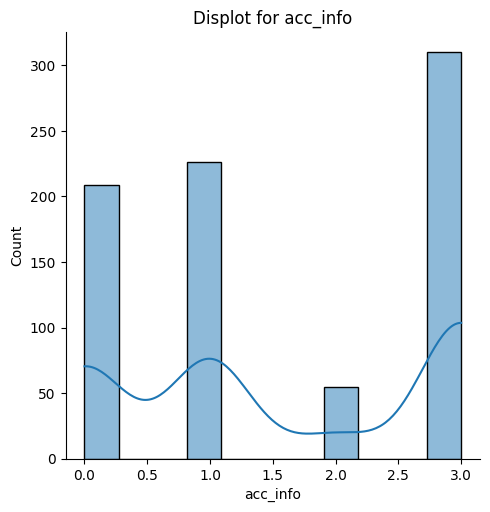

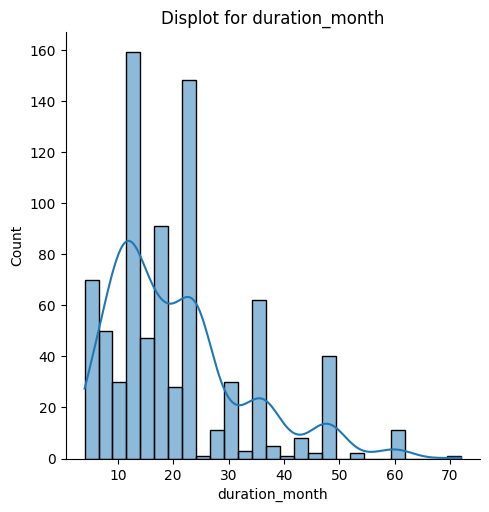

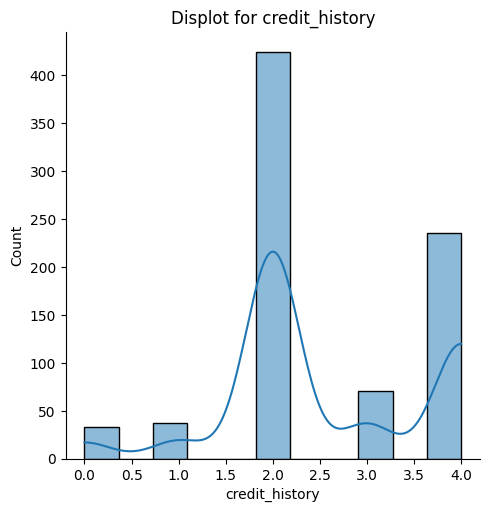

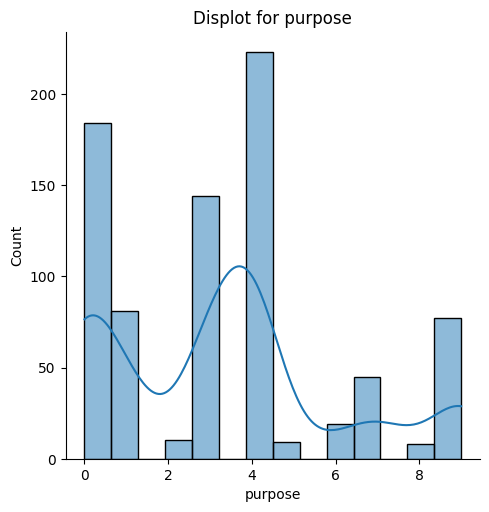

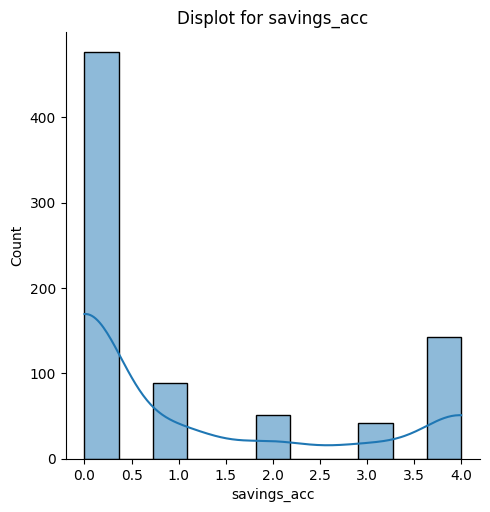

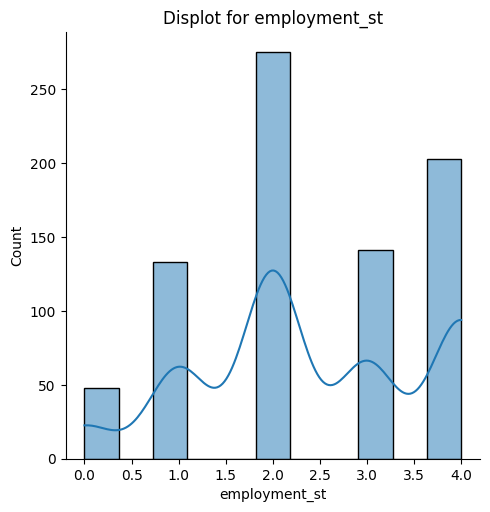

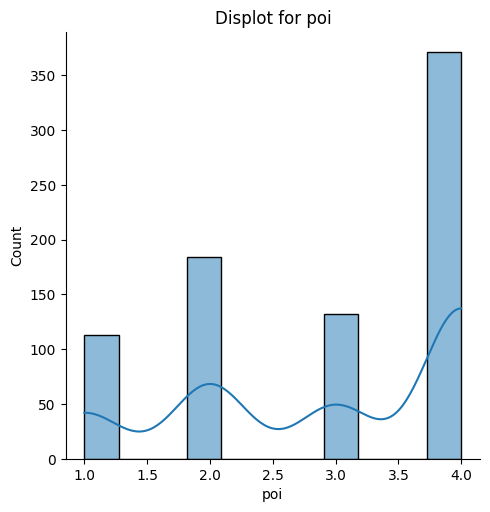

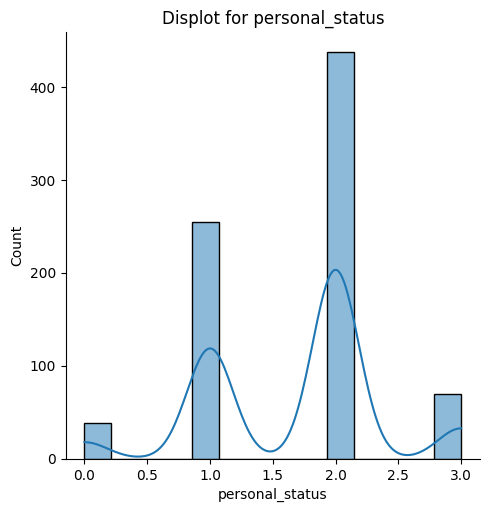

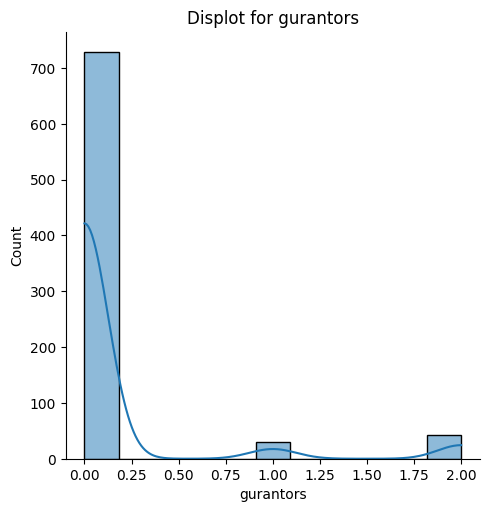

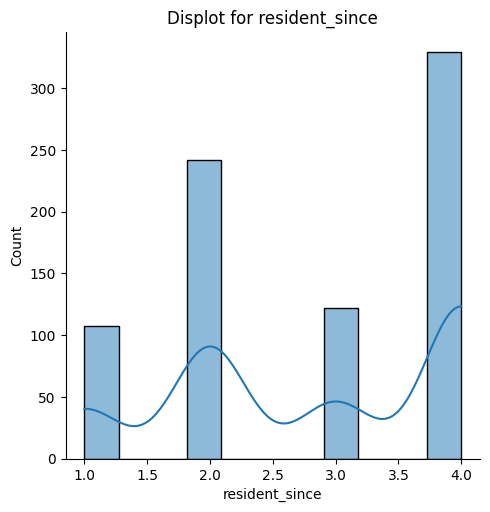

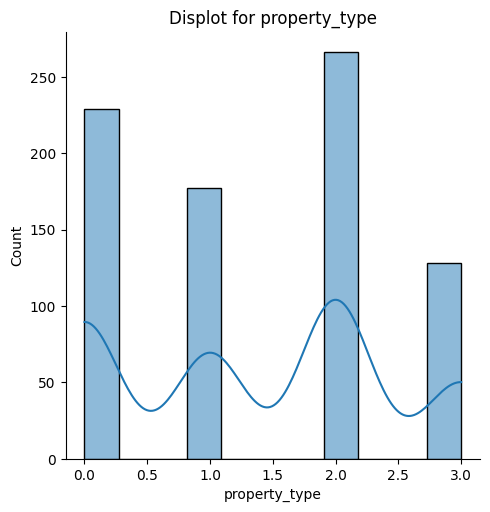

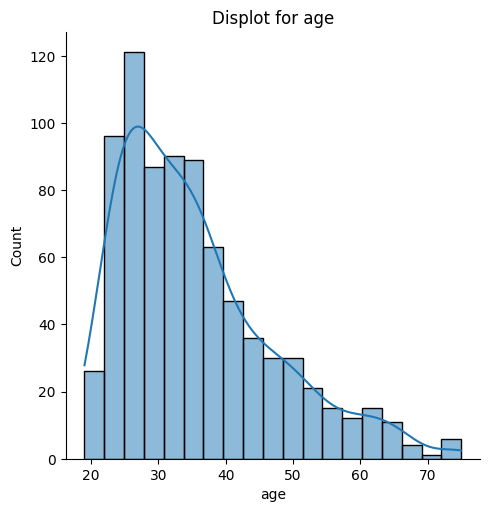

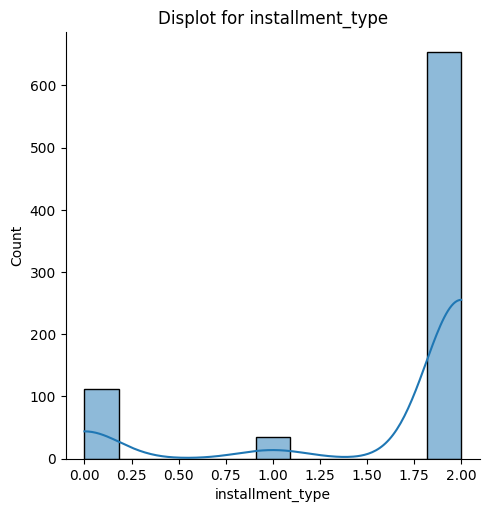

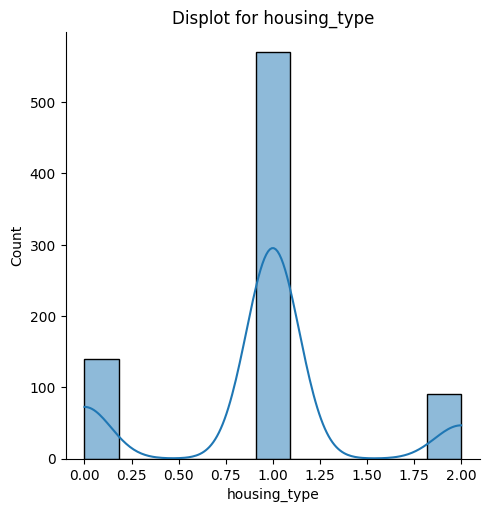

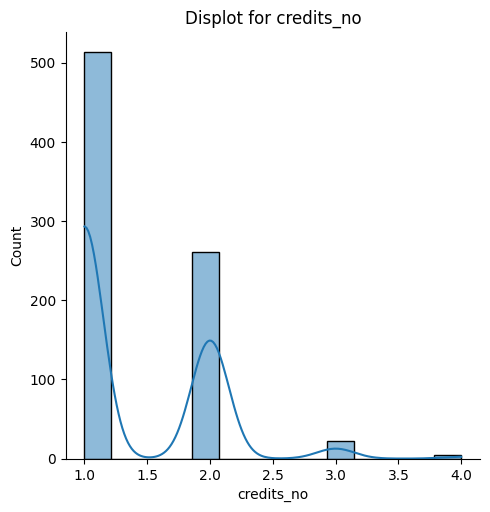

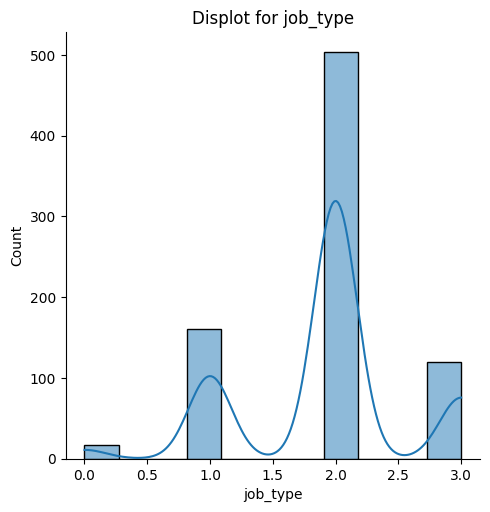

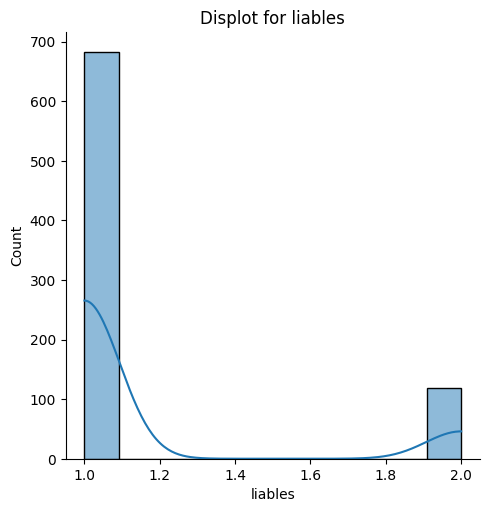

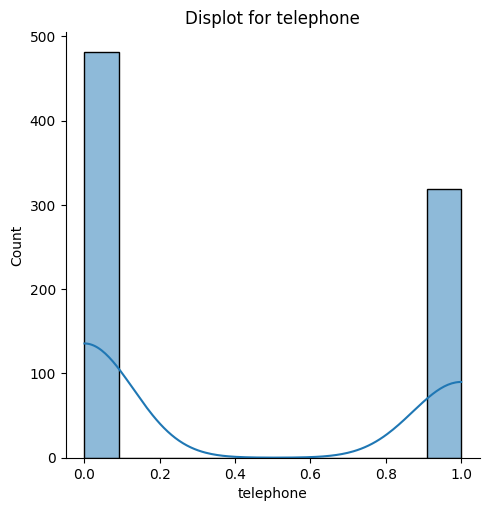

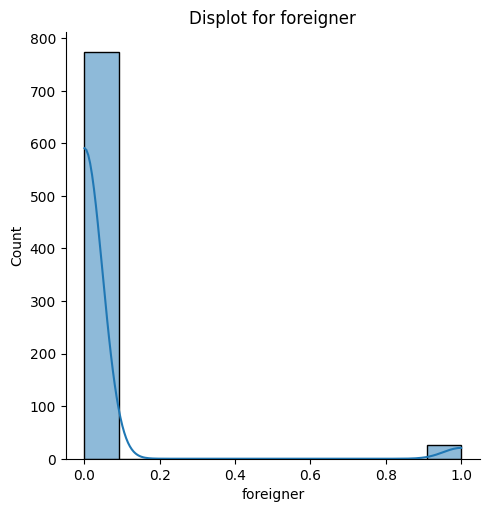

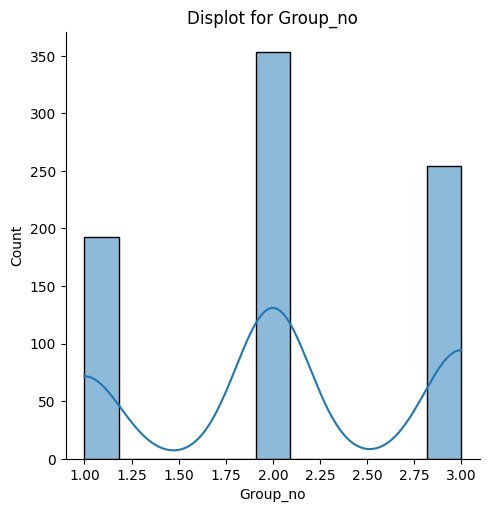

In [184]:
for i in train.columns:
  sns.displot(train[i] , kde = True )
  plt.title(f'Displot for {i}')

Since most of the **Columns** are **Categorical**, **Displot Graphical** way of finding outliers is not best although we can **Caluclate The Count** of each category in that column.

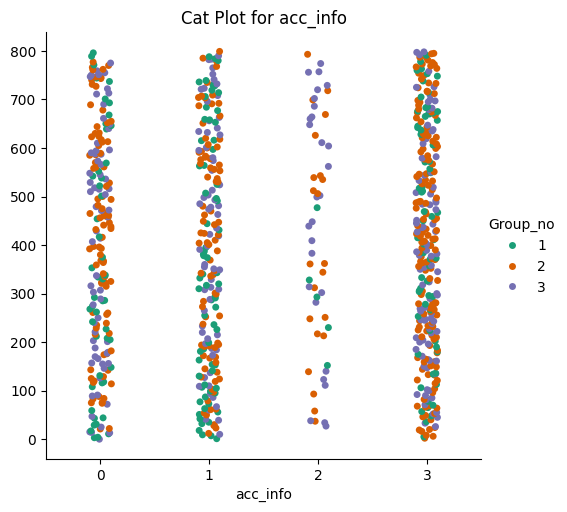

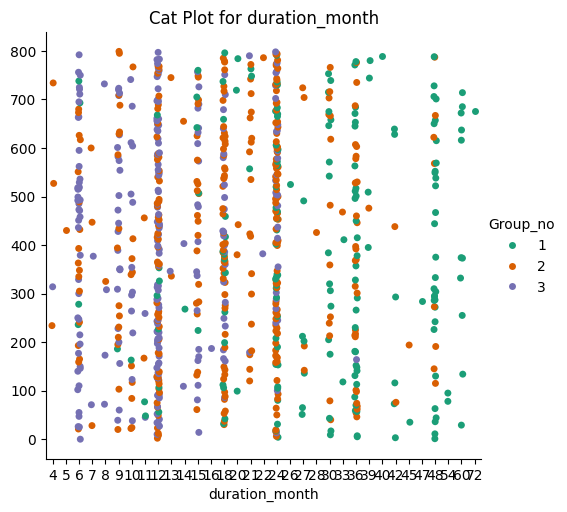

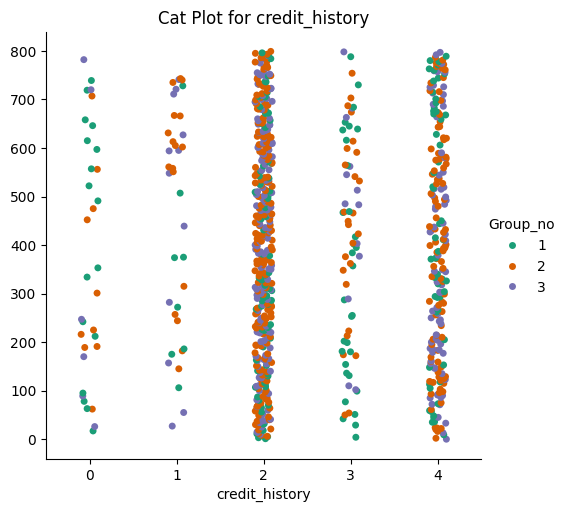

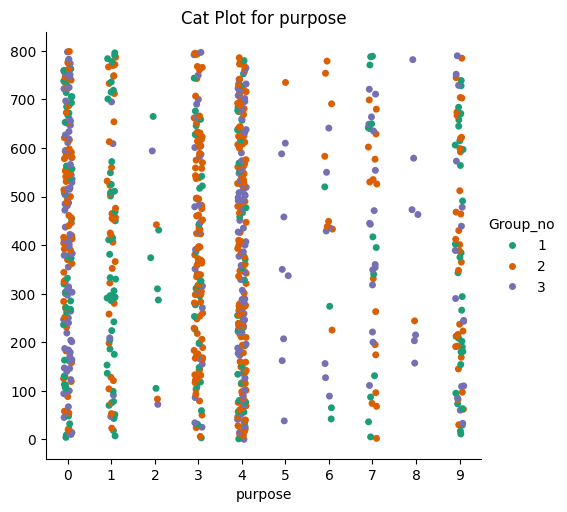

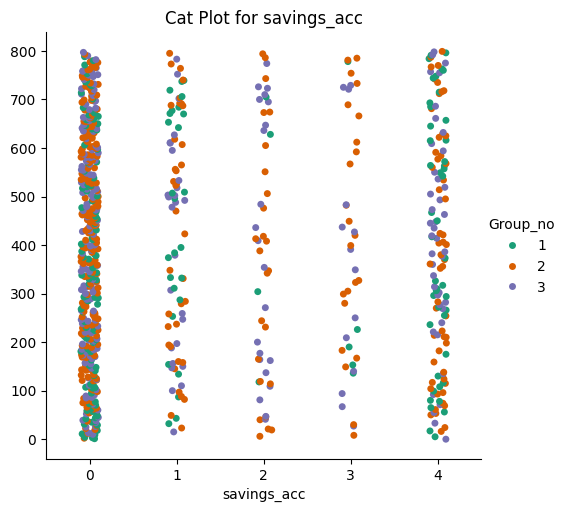

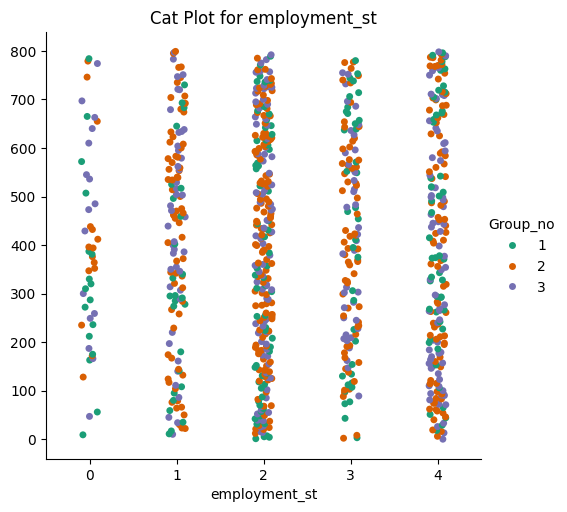

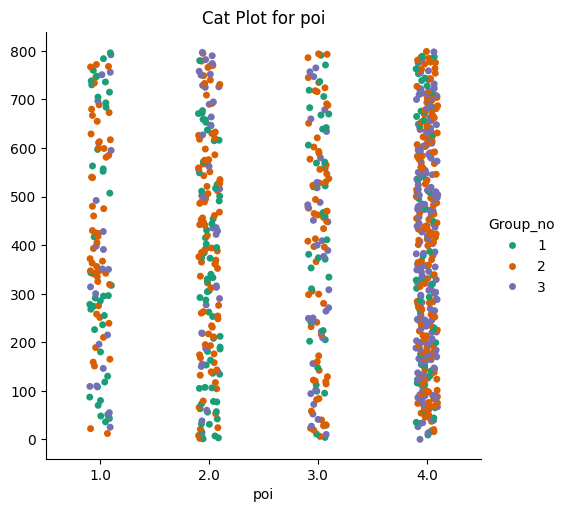

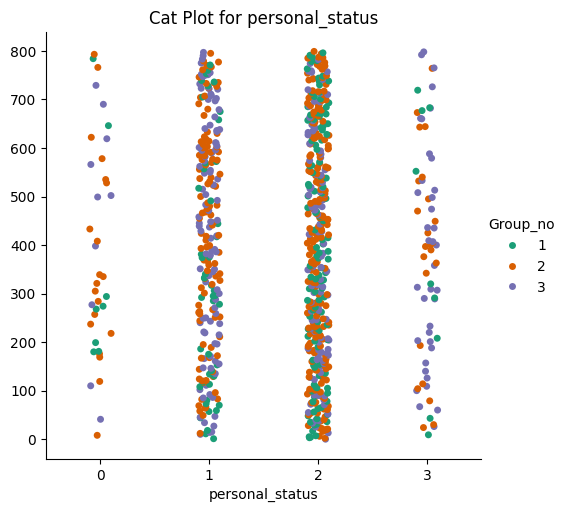

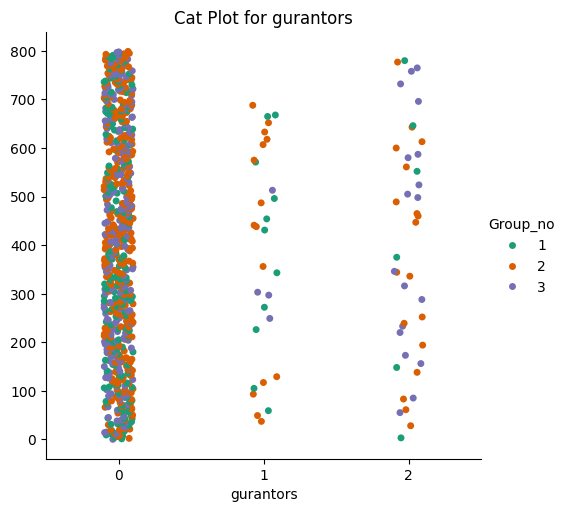

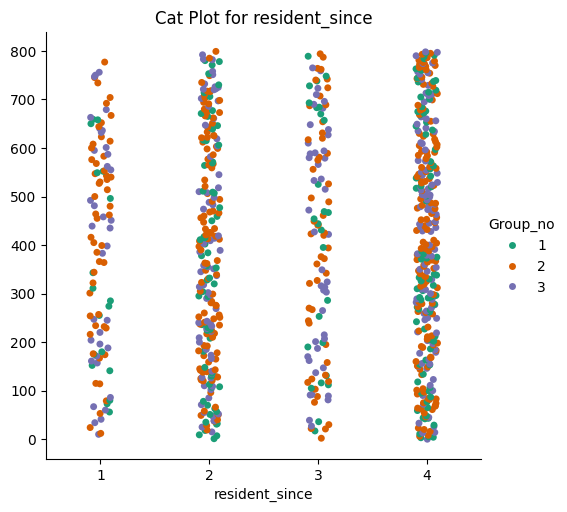

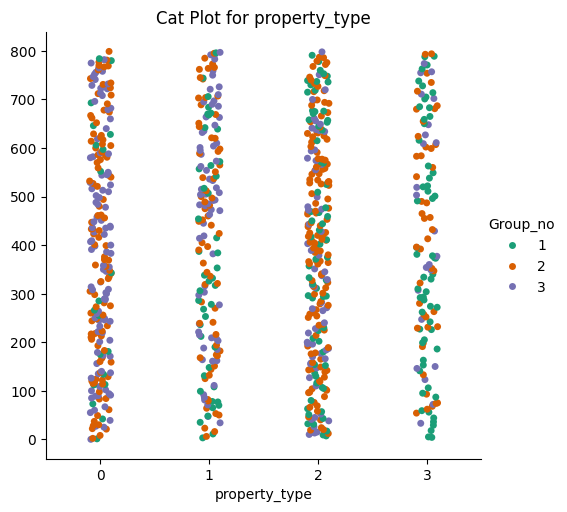

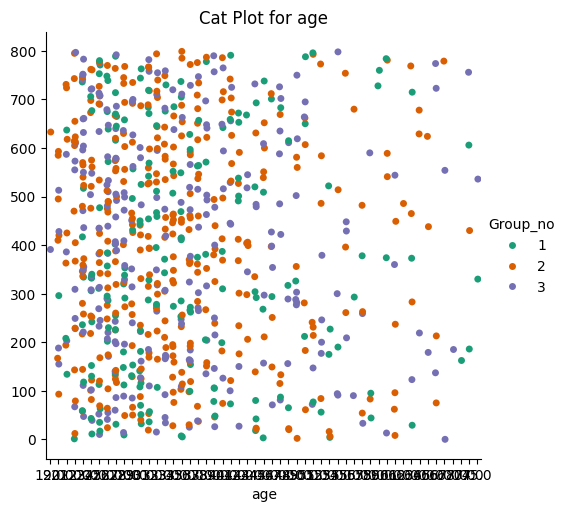

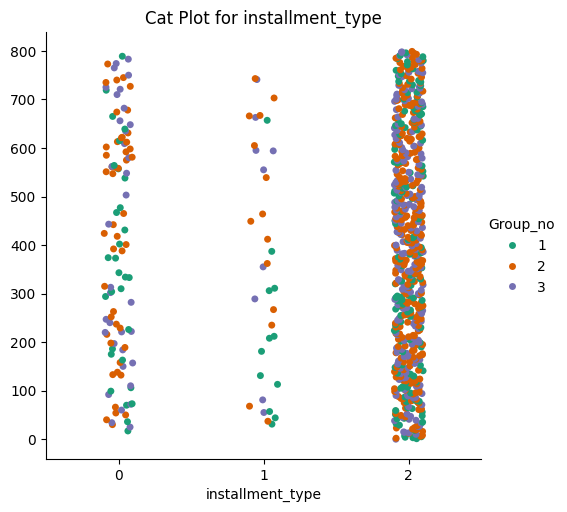

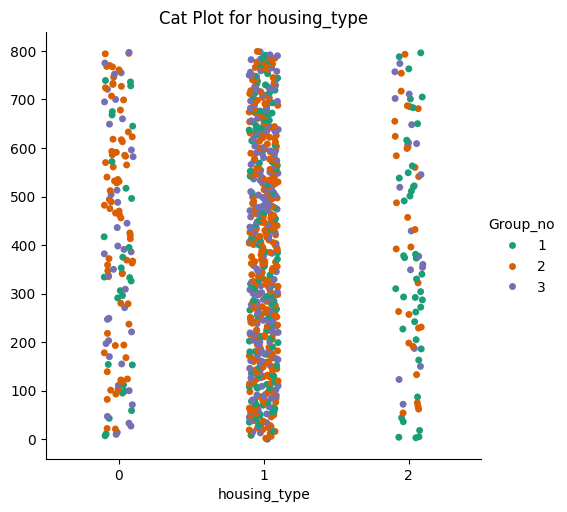

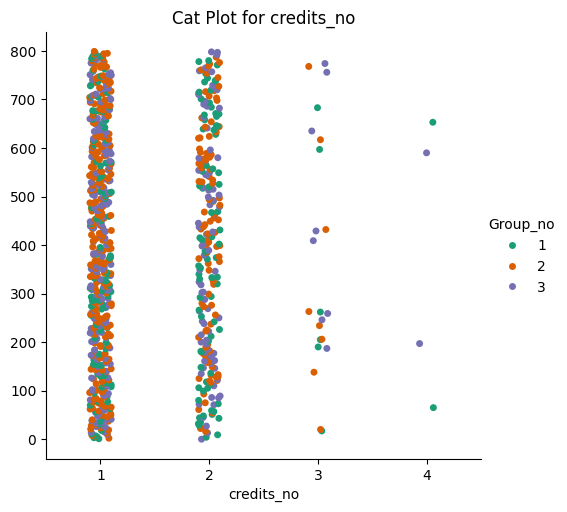

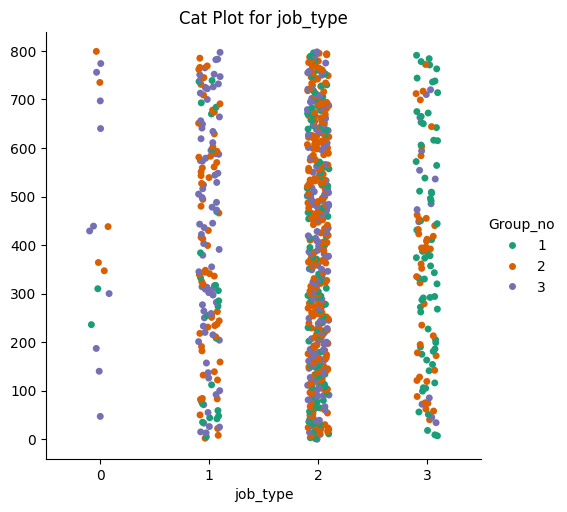

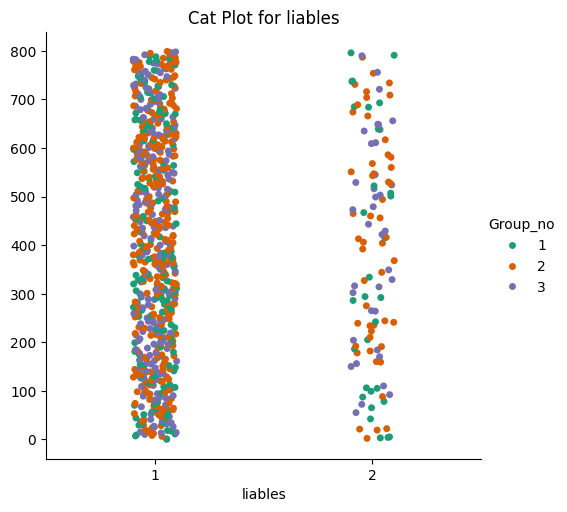

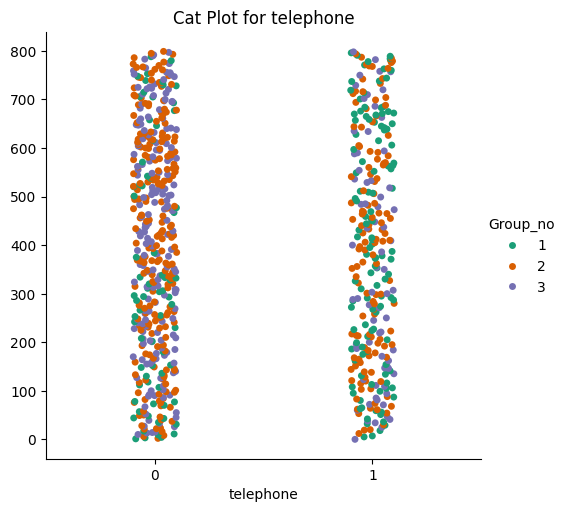

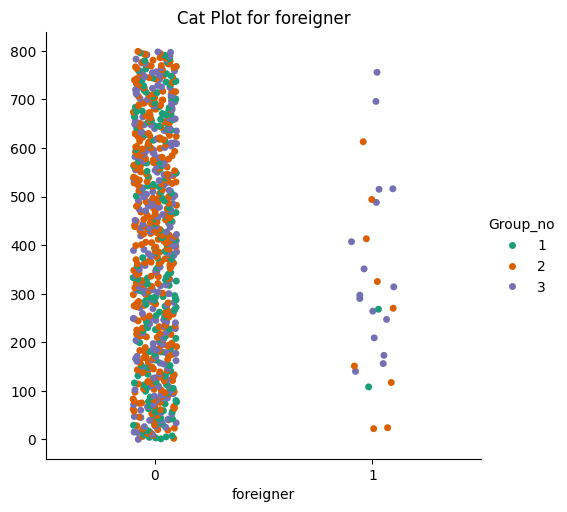

In [187]:
for i in train.columns:
  if i!='Group_no':
    sns.catplot(data = train , x = train[i] , y = range(0 , 800) , hue = train['Group_no'] , palette = 'Dark2')
    plt.title(f"Cat Plot for {i}")
    plt.show()

Here we visualize how the classification of **Group_no** is fitted in each column of the dataset. We can also say that it this graph is better way of **Representing Displot**.

<Axes: >

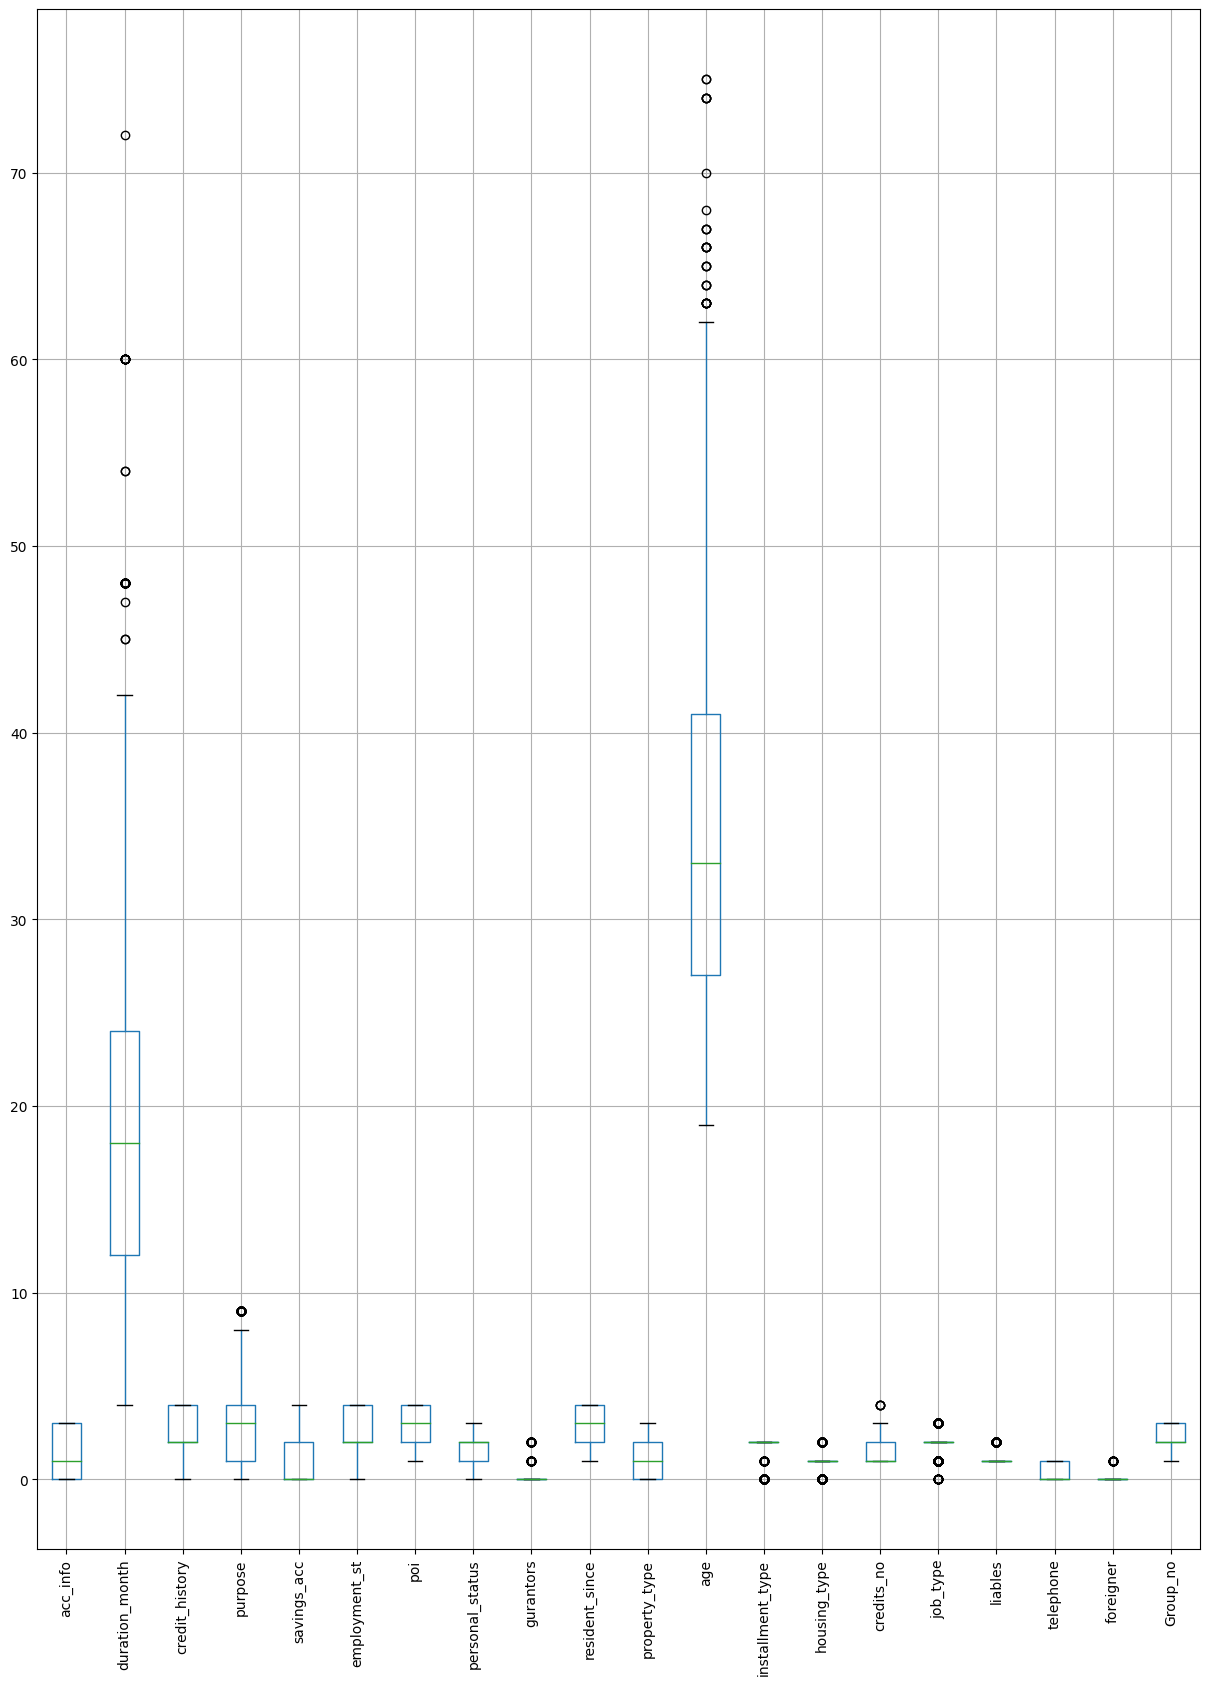

In [288]:
train.boxplot(rot=90,figsize=(15,20))

Using **Boxplot** to visualize the **Outliers** in the dataset. To be **Noticed** that all **Outliers Aren't To Be Removed!**. We **Notice** that outiers are not **That Far**, with **Indicates** that is data is not **Highly Skewed**.

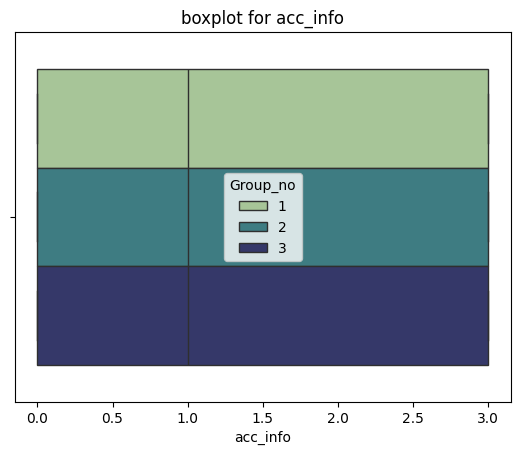

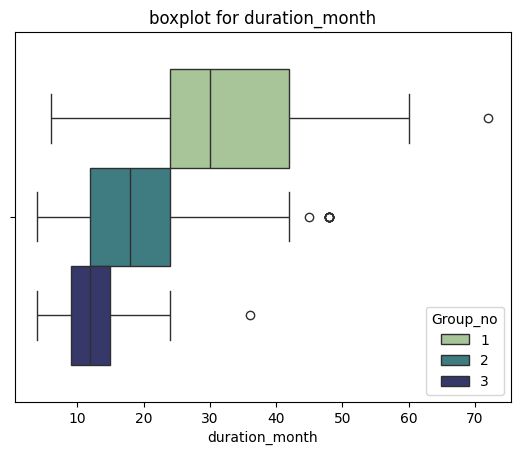

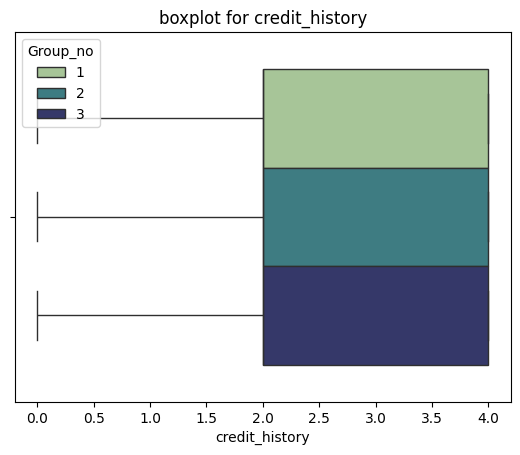

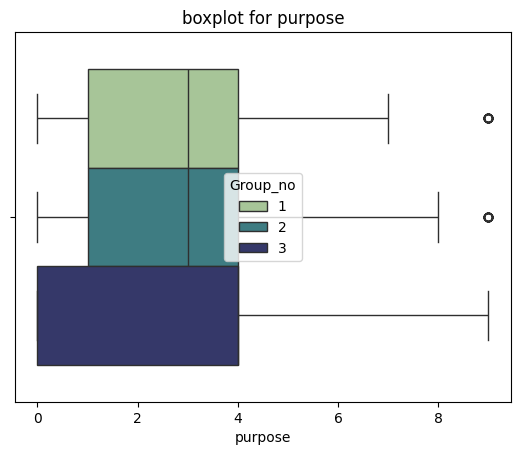

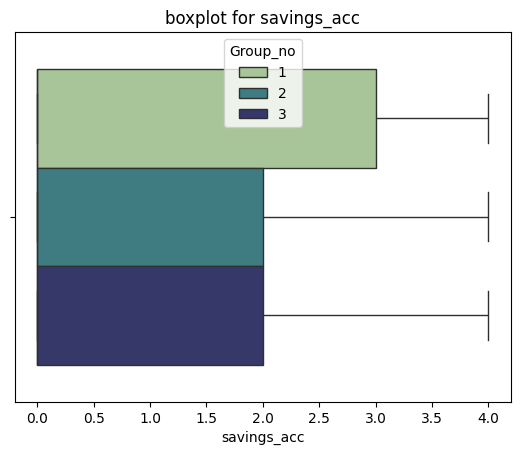

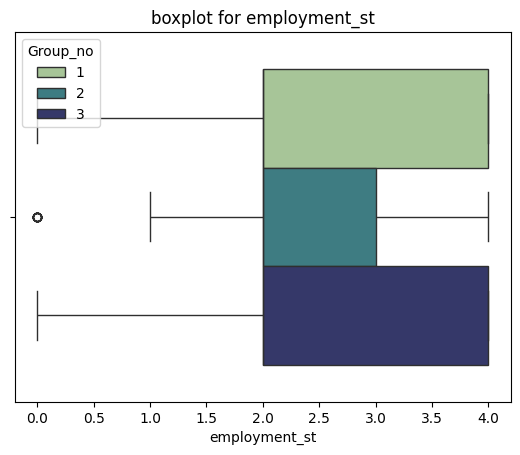

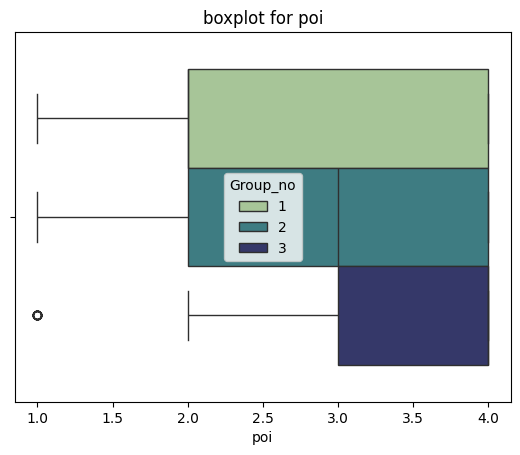

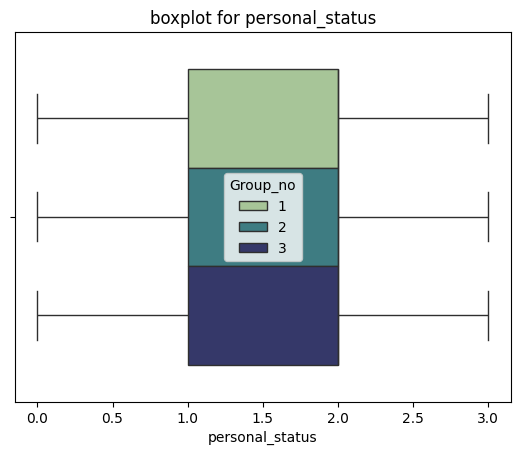

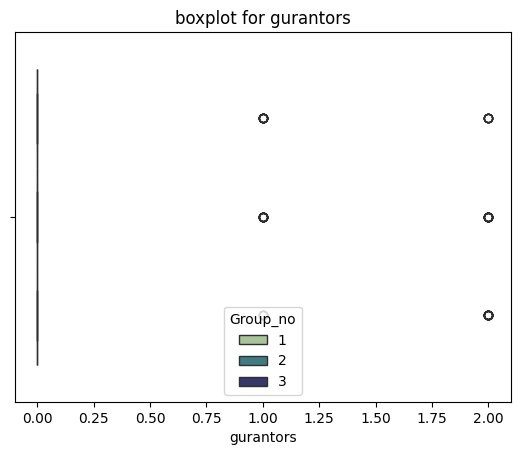

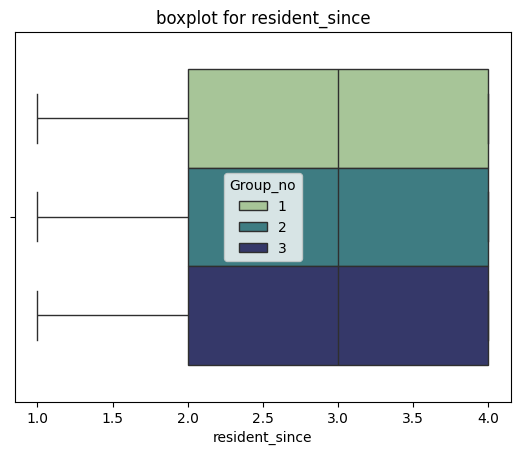

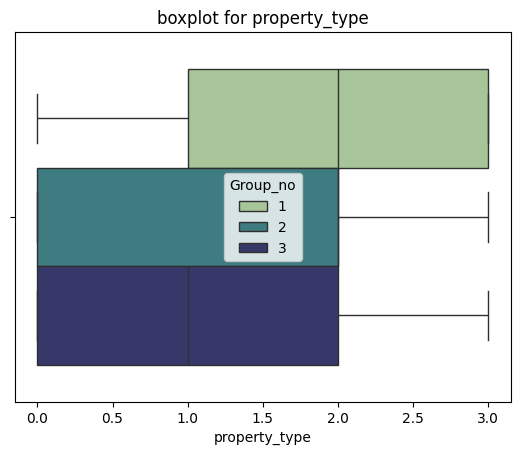

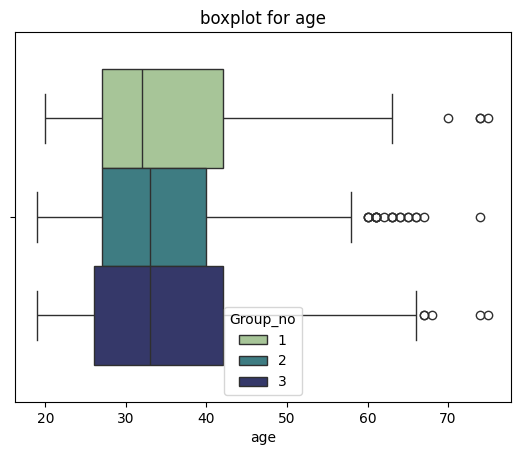

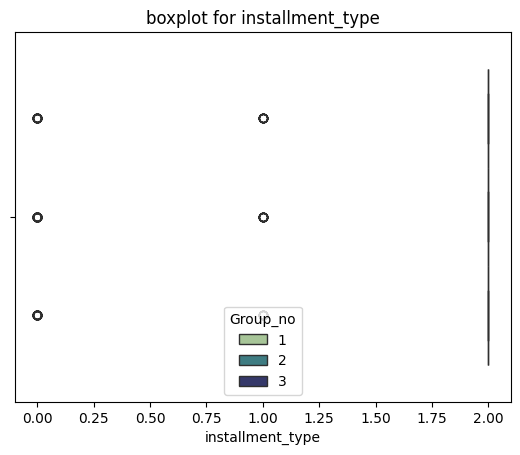

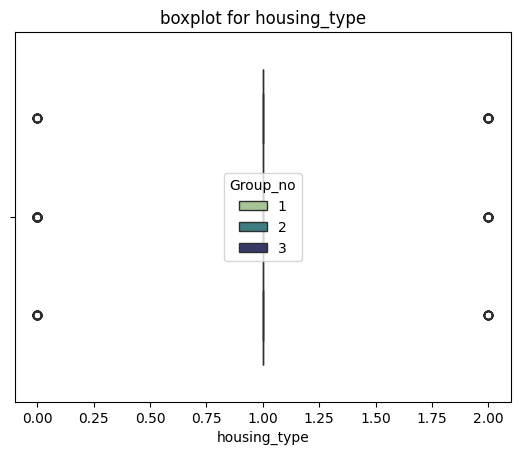

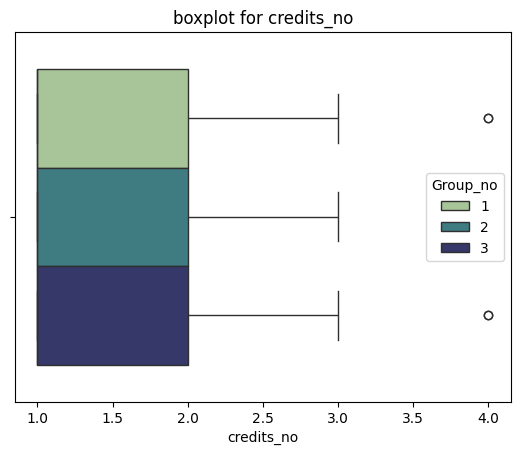

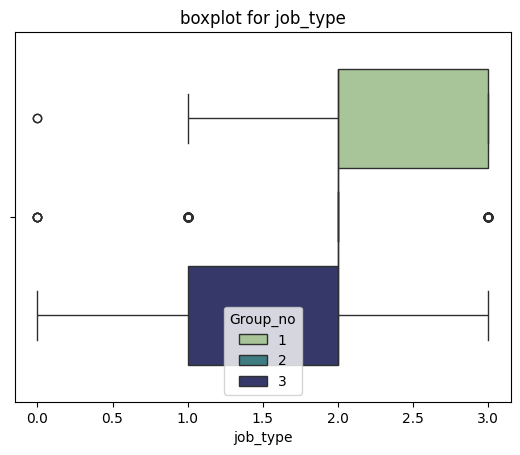

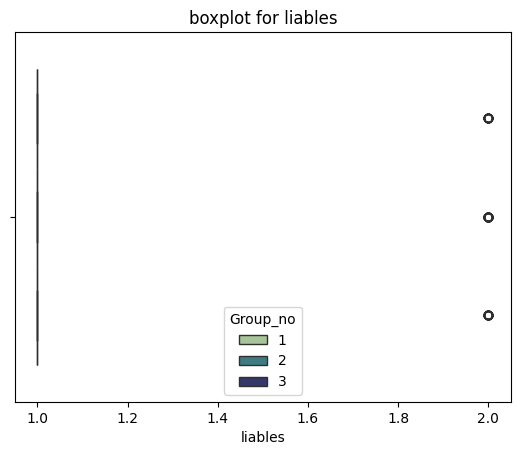

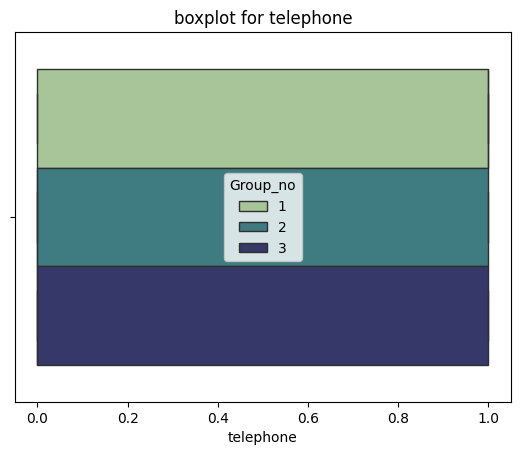

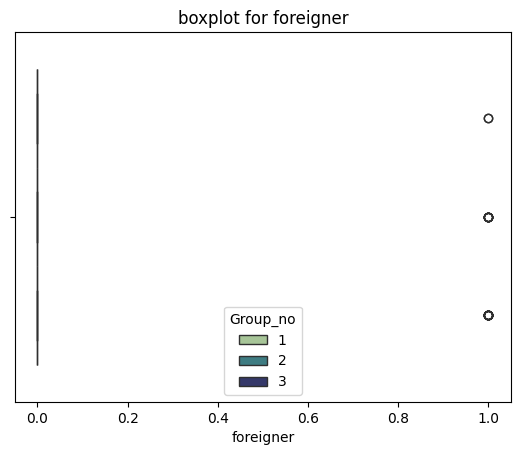

In [185]:
for i in train.columns:
  if i!='Group_no':
    sns.boxplot(data = train , x = train[i] , hue = train['Group_no'] , palette = 'crest')
    plt.title(f"boxplot for {i}")
    plt.show()

A colorful representation of each columns of **Boxplot Graph**.


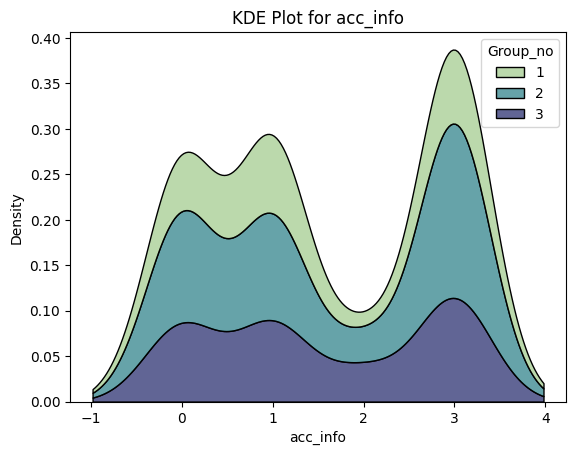

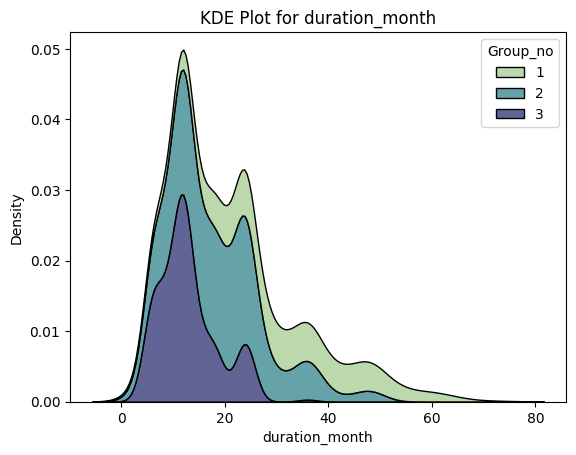

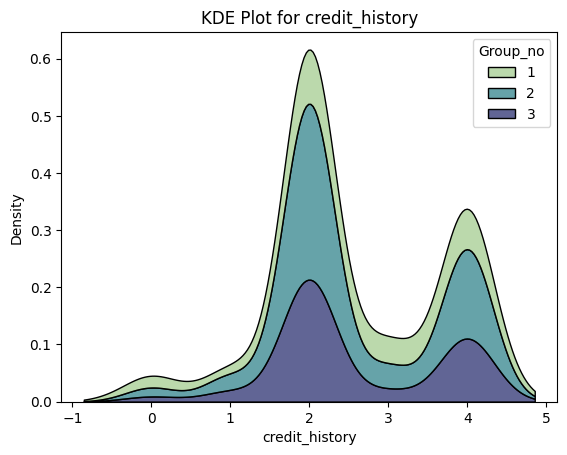

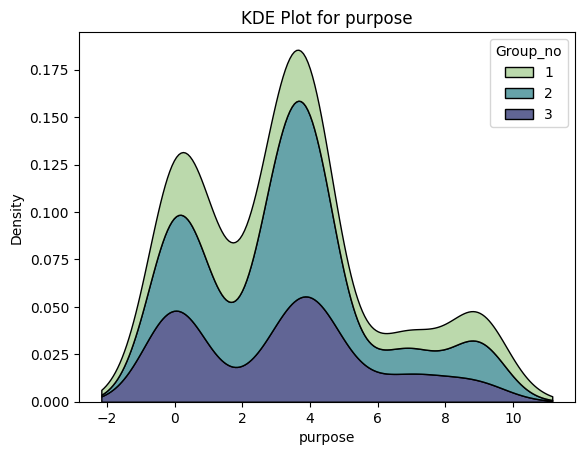

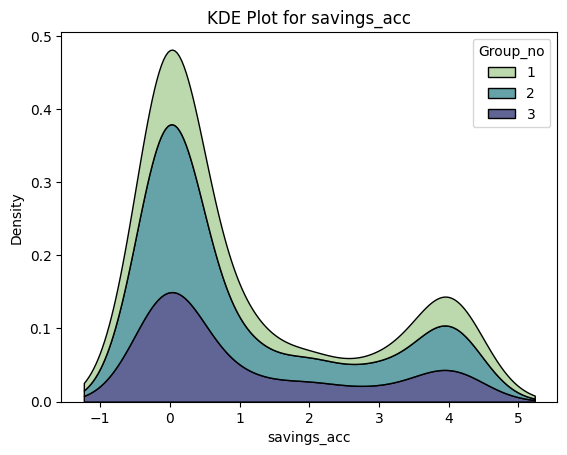

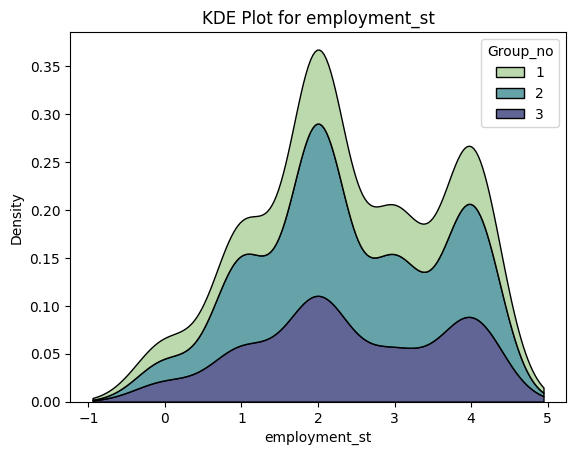

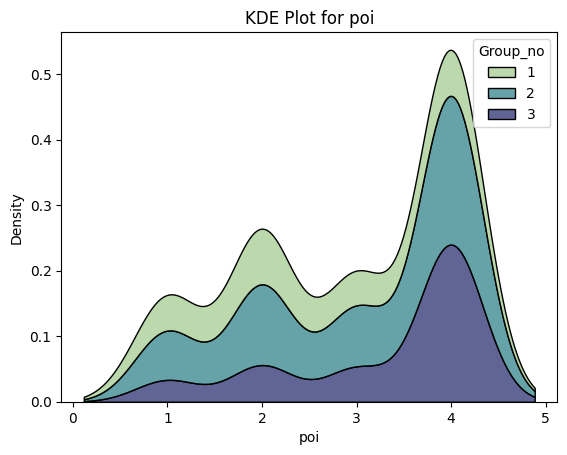

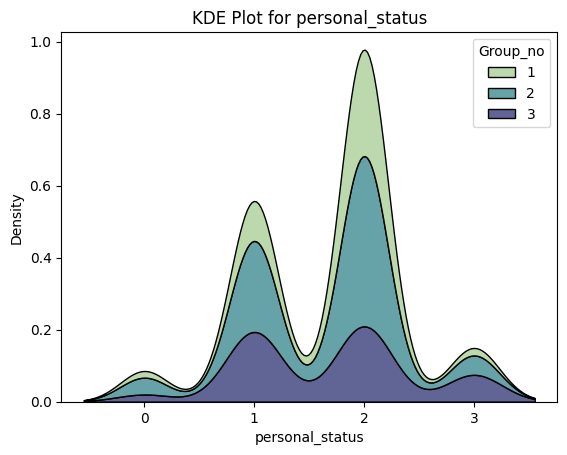

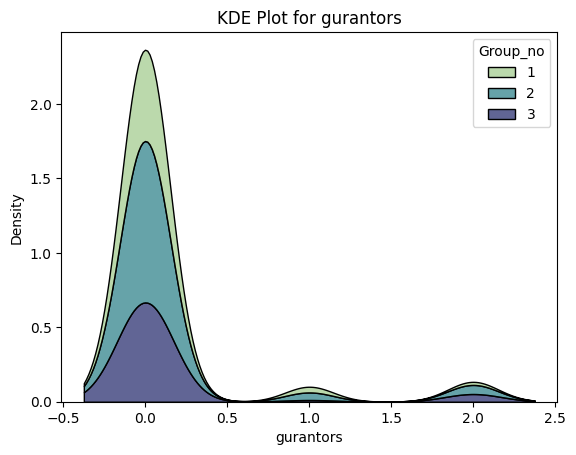

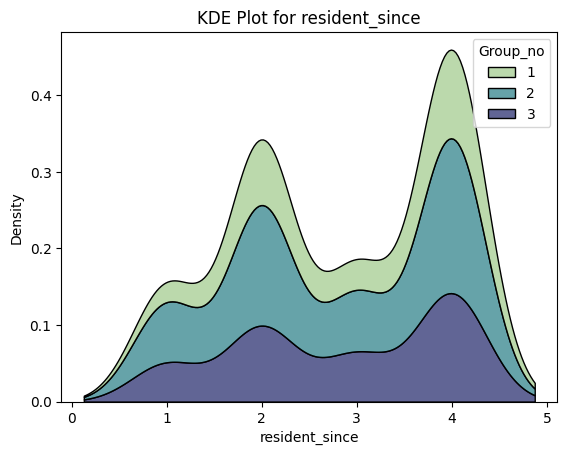

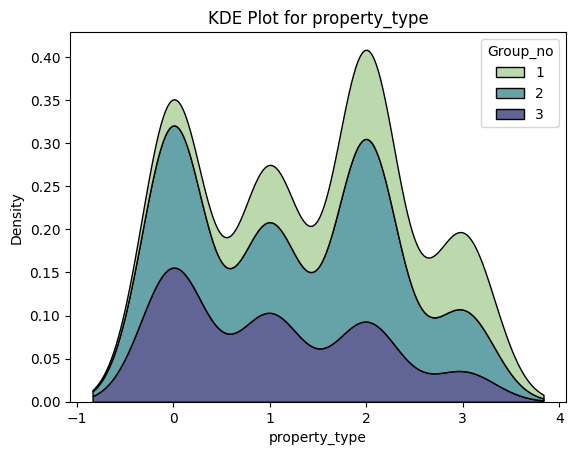

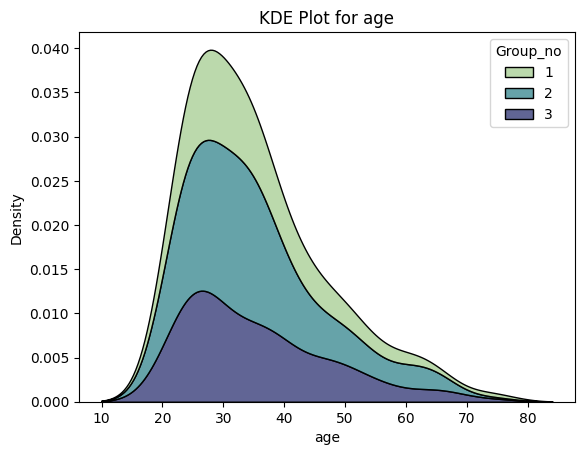

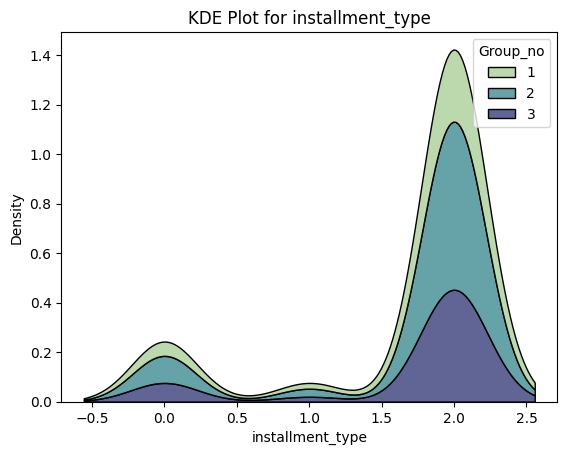

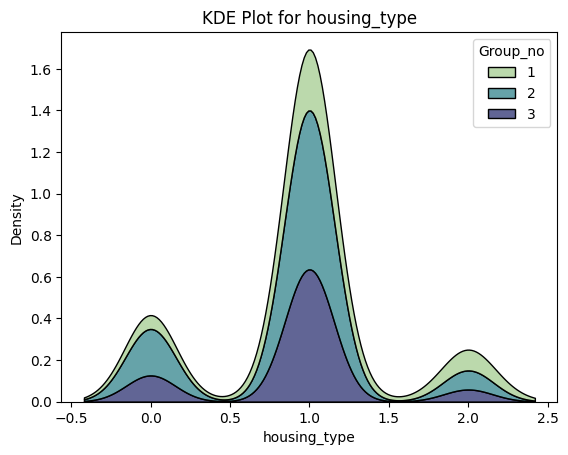

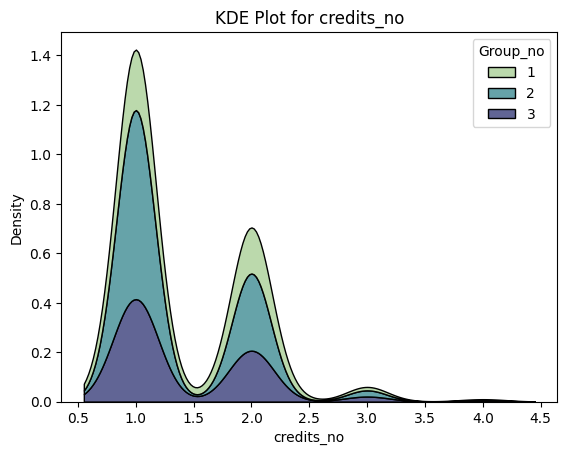

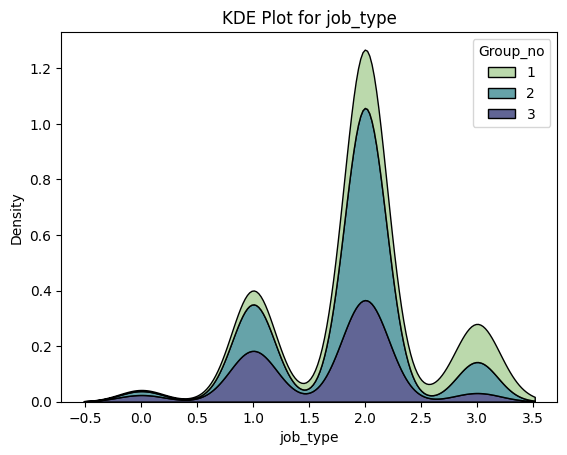

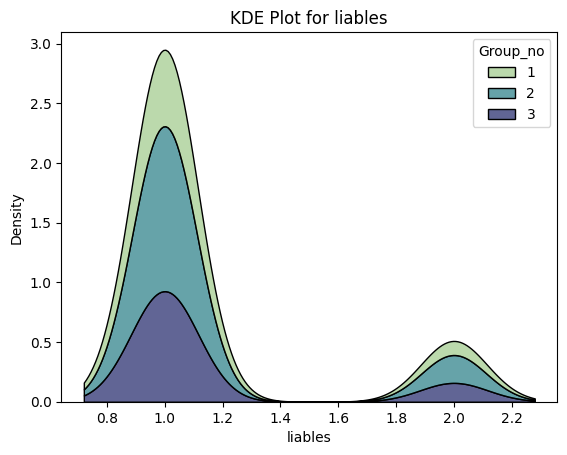

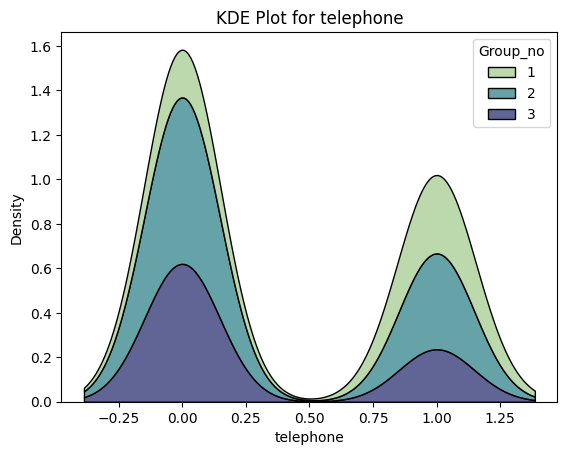

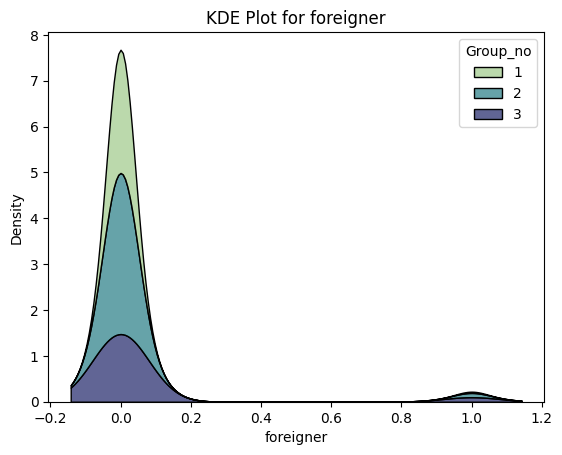

In [186]:
for i in train.columns:
  if i!='Group_no':
    sns.kdeplot(data = train , x = train[i] , hue = train['Group_no'] , multiple = 'stack' , palette = 'crest')
    plt.title(f"KDE Plot for {i}")
    plt.show()

Using **KDE Plot** to make a **Conclusion** that any feature in the dataset best **Classifies the Group_no**. And we made inference that **No Feature has Classified the Group_no**.

## Bi-Variate Analysis

<Axes: >

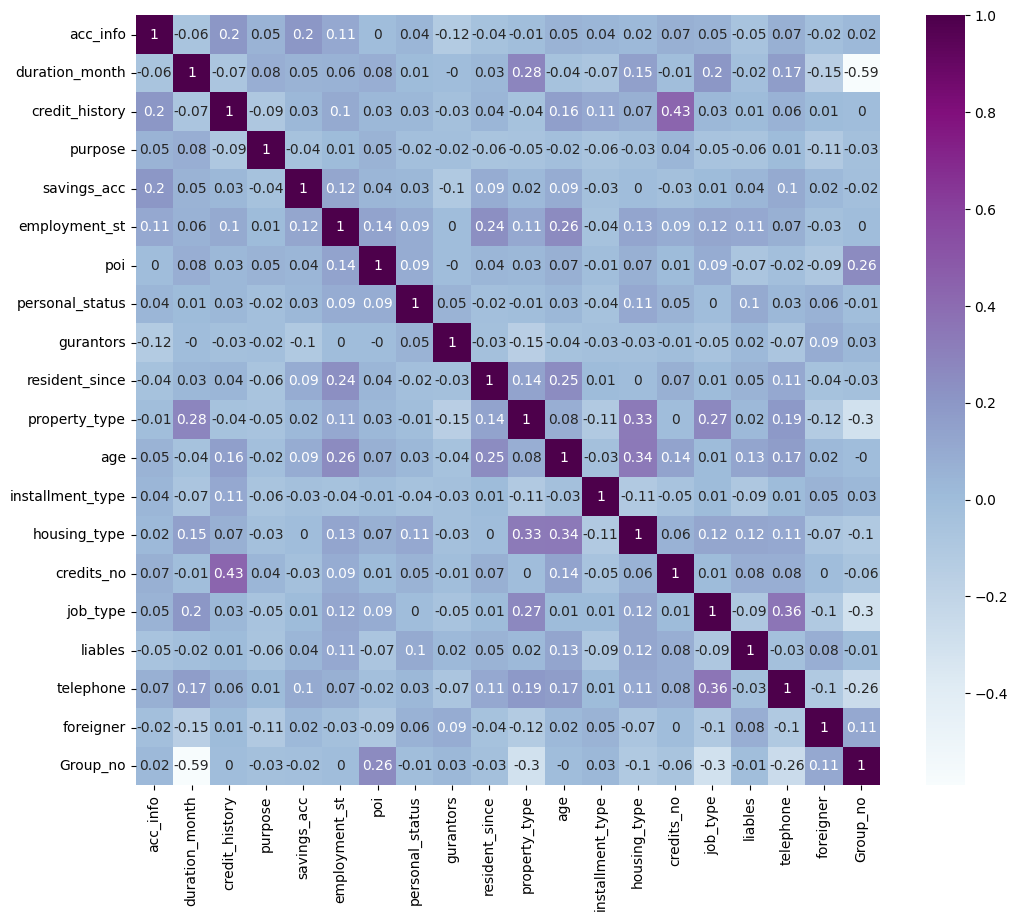

In [188]:
plt.figure(figsize = (12,10))
sns.heatmap(round(train.corr(),2) , annot = True , cmap = 'BuPu')

We use **Heatmap** to find the **Correlation Between Columns of Dataset.** If any two columns have **High Correlation** then we can **Remove One of Them**, but since we have **Less Columns** we can proceed with data modelling.

# Splitting Of Data

In [189]:
x = train.drop(['Group_no'], axis=1 )
y=train['Group_no']

In [190]:
x_train, x_test, y_train, y_test = train_test_split (x , y , test_size=0.2 , random_state = 43)

# Model Evaluation Function

In [191]:
def model_eval(actual , predicted):
  conf_matrix = confusion_matrix(actual , predicted)
  clas_rep = classification_report(actual , predicted)
  acc_score = accuracy_score(actual , predicted)

  print("The Accuracy of the Model is:" , round(acc_score , 2))
  print(conf_matrix)
  print(clas_rep)

# Classification Models

## Logistic Regression

In [192]:
lr = LogisticRegression(max_iter = 10000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [193]:
y_hat_train_lr = lr.predict(x_train)
y_hat_test_lr = lr.predict(x_test)

In [194]:
model_eval (y_train, y_hat_train_lr)

The Accuracy of the Model is: 0.7
[[104  51   3]
 [ 26 206  50]
 [  2  63 135]]
              precision    recall  f1-score   support

           1       0.79      0.66      0.72       158
           2       0.64      0.73      0.68       282
           3       0.72      0.68      0.70       200

    accuracy                           0.70       640
   macro avg       0.72      0.69      0.70       640
weighted avg       0.70      0.70      0.70       640



In [195]:
model_eval (y_test, y_hat_test_lr)

The Accuracy of the Model is: 0.66
[[23 12  0]
 [ 8 47 16]
 [ 0 18 36]]
              precision    recall  f1-score   support

           1       0.74      0.66      0.70        35
           2       0.61      0.66      0.64        71
           3       0.69      0.67      0.68        54

    accuracy                           0.66       160
   macro avg       0.68      0.66      0.67       160
weighted avg       0.67      0.66      0.66       160



## Decision Tree Classifier

In [196]:
dtree = DecisionTreeClassifier(max_depth = 4)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [197]:
y_hat_train_dtree = dtree.predict(x_train)
y_hat_test_dtree = dtree.predict(x_test)

In [198]:
model_eval (y_train, y_hat_train_dtree)

The Accuracy of the Model is: 0.67
[[104  53   1]
 [ 30 228  24]
 [  4  98  98]]
              precision    recall  f1-score   support

           1       0.75      0.66      0.70       158
           2       0.60      0.81      0.69       282
           3       0.80      0.49      0.61       200

    accuracy                           0.67       640
   macro avg       0.72      0.65      0.67       640
weighted avg       0.70      0.67      0.67       640



In [199]:
model_eval (y_test, y_hat_test_dtree)

The Accuracy of the Model is: 0.64
[[24 11  0]
 [12 53  6]
 [ 0 29 25]]
              precision    recall  f1-score   support

           1       0.67      0.69      0.68        35
           2       0.57      0.75      0.65        71
           3       0.81      0.46      0.59        54

    accuracy                           0.64       160
   macro avg       0.68      0.63      0.64       160
weighted avg       0.67      0.64      0.63       160



## Random Forest Classifier

In [200]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 4)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=200)

In [201]:
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

In [202]:
model_eval (y_train, y_hat_train_rf)

The Accuracy of the Model is: 0.73
[[ 96  60   2]
 [ 12 248  22]
 [  1  78 121]]
              precision    recall  f1-score   support

           1       0.88      0.61      0.72       158
           2       0.64      0.88      0.74       282
           3       0.83      0.60      0.70       200

    accuracy                           0.73       640
   macro avg       0.79      0.70      0.72       640
weighted avg       0.76      0.73      0.72       640



In [203]:
model_eval (y_test, y_hat_test_rf)

The Accuracy of the Model is: 0.69
[[21 14  0]
 [ 5 61  5]
 [ 0 26 28]]
              precision    recall  f1-score   support

           1       0.81      0.60      0.69        35
           2       0.60      0.86      0.71        71
           3       0.85      0.52      0.64        54

    accuracy                           0.69       160
   macro avg       0.75      0.66      0.68       160
weighted avg       0.73      0.69      0.68       160



## AdaBoost Classifier

In [204]:
ada = AdaBoostClassifier(n_estimators = 200)
ada.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [205]:
y_hat_train_ada = ada.predict(x_train)
y_hat_test_ada = ada.predict(x_test)

In [206]:
model_eval (y_train, y_hat_train_ada)

The Accuracy of the Model is: 0.69
[[113  43   2]
 [ 48 179  55]
 [  1  49 150]]
              precision    recall  f1-score   support

           1       0.70      0.72      0.71       158
           2       0.66      0.63      0.65       282
           3       0.72      0.75      0.74       200

    accuracy                           0.69       640
   macro avg       0.69      0.70      0.70       640
weighted avg       0.69      0.69      0.69       640



In [207]:
model_eval (y_test, y_hat_test_ada)

The Accuracy of the Model is: 0.64
[[29  3  3]
 [16 38 17]
 [ 0 18 36]]
              precision    recall  f1-score   support

           1       0.64      0.83      0.73        35
           2       0.64      0.54      0.58        71
           3       0.64      0.67      0.65        54

    accuracy                           0.64       160
   macro avg       0.64      0.68      0.65       160
weighted avg       0.64      0.64      0.64       160



## Gradient Boost Classifer

In [208]:
gb = GradientBoostingClassifier(n_estimators = 200, max_depth = 3)
gb.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [209]:
y_hat_train_gb = gb.predict(x_train)
y_hat_test_gb = gb.predict(x_test)

In [210]:
model_eval (y_train, y_hat_train_gb)

The Accuracy of the Model is: 0.97
[[148  10   0]
 [  0 280   2]
 [  0   5 195]]
              precision    recall  f1-score   support

           1       1.00      0.94      0.97       158
           2       0.95      0.99      0.97       282
           3       0.99      0.97      0.98       200

    accuracy                           0.97       640
   macro avg       0.98      0.97      0.97       640
weighted avg       0.97      0.97      0.97       640



In [211]:
model_eval (y_test, y_hat_test_gb)

The Accuracy of the Model is: 0.69
[[25  6  4]
 [ 8 47 16]
 [ 0 16 38]]
              precision    recall  f1-score   support

           1       0.76      0.71      0.74        35
           2       0.68      0.66      0.67        71
           3       0.66      0.70      0.68        54

    accuracy                           0.69       160
   macro avg       0.70      0.69      0.70       160
weighted avg       0.69      0.69      0.69       160



## XG Boosting Classifier

In [251]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.fit_transform(y_test)

In [284]:
xgb = XGBClassifier(max_depth = 4 , gamma = 5.0)
xgb.fit(x_train , y_train_enc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [285]:
y_hat_train_xgb = xgb.predict(x_train)
y_hat_test_xgb = xgb.predict(x_test)

In [286]:
model_eval(y_train_enc , y_hat_train_xgb)

The Accuracy of the Model is: 0.66
[[ 91  64   3]
 [ 24 219  39]
 [  0  90 110]]
              precision    recall  f1-score   support

           0       0.79      0.58      0.67       158
           1       0.59      0.78      0.67       282
           2       0.72      0.55      0.63       200

    accuracy                           0.66       640
   macro avg       0.70      0.63      0.65       640
weighted avg       0.68      0.66      0.65       640



In [287]:
model_eval(y_test_enc , y_hat_test_xgb)

The Accuracy of the Model is: 0.64
[[22 13  0]
 [ 8 50 13]
 [ 0 23 31]]
              precision    recall  f1-score   support

           0       0.73      0.63      0.68        35
           1       0.58      0.70      0.64        71
           2       0.70      0.57      0.63        54

    accuracy                           0.64       160
   macro avg       0.67      0.64      0.65       160
weighted avg       0.66      0.64      0.64       160



## NavieBayes Classifier

In [217]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [218]:
y_hat_train_nb = nb.predict(x_train)
y_hat_test_nb = nb.predict(x_test)

In [219]:
model_eval(y_train,y_hat_train_nb)

The Accuracy of the Model is: 0.62
[[117  36   5]
 [ 66 163  53]
 [ 16  69 115]]
              precision    recall  f1-score   support

           1       0.59      0.74      0.66       158
           2       0.61      0.58      0.59       282
           3       0.66      0.57      0.62       200

    accuracy                           0.62       640
   macro avg       0.62      0.63      0.62       640
weighted avg       0.62      0.62      0.62       640



In [220]:
model_eval(y_test,y_hat_test_nb)

The Accuracy of the Model is: 0.56
[[28  6  1]
 [17 35 19]
 [ 2 25 27]]
              precision    recall  f1-score   support

           1       0.60      0.80      0.68        35
           2       0.53      0.49      0.51        71
           3       0.57      0.50      0.53        54

    accuracy                           0.56       160
   macro avg       0.57      0.60      0.58       160
weighted avg       0.56      0.56      0.56       160



## K Nearest Neighbors Classifier

In [221]:
acc_list = []
for i in range(1,100):
  knn2 = KNeighborsClassifier(n_neighbors = i)
  knn2.fit(x_train , y_train)
  y_hat_test_knn2 = knn2.predict(x_test)
  acc_list.append(round(accuracy_score(y_test , y_hat_test_knn2) , 2))
print(acc_list)

[0.53, 0.53, 0.57, 0.57, 0.57, 0.57, 0.59, 0.61, 0.64, 0.64, 0.64, 0.59, 0.64, 0.63, 0.62, 0.64, 0.64, 0.64, 0.64, 0.65, 0.64, 0.64, 0.63, 0.64, 0.64, 0.64, 0.64, 0.63, 0.62, 0.63, 0.65, 0.64, 0.64, 0.66, 0.64, 0.64, 0.61, 0.61, 0.61, 0.62, 0.62, 0.64, 0.63, 0.62, 0.62, 0.63, 0.62, 0.62, 0.61, 0.61, 0.59, 0.6, 0.59, 0.59, 0.59, 0.59, 0.59, 0.6, 0.6, 0.59, 0.6, 0.61, 0.6, 0.6, 0.61, 0.6, 0.6, 0.6, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.62, 0.61, 0.61, 0.6, 0.6, 0.61, 0.62, 0.61, 0.61, 0.61, 0.61, 0.59, 0.59, 0.6, 0.6, 0.6, 0.6, 0.6, 0.61, 0.59, 0.59, 0.58, 0.57, 0.58]


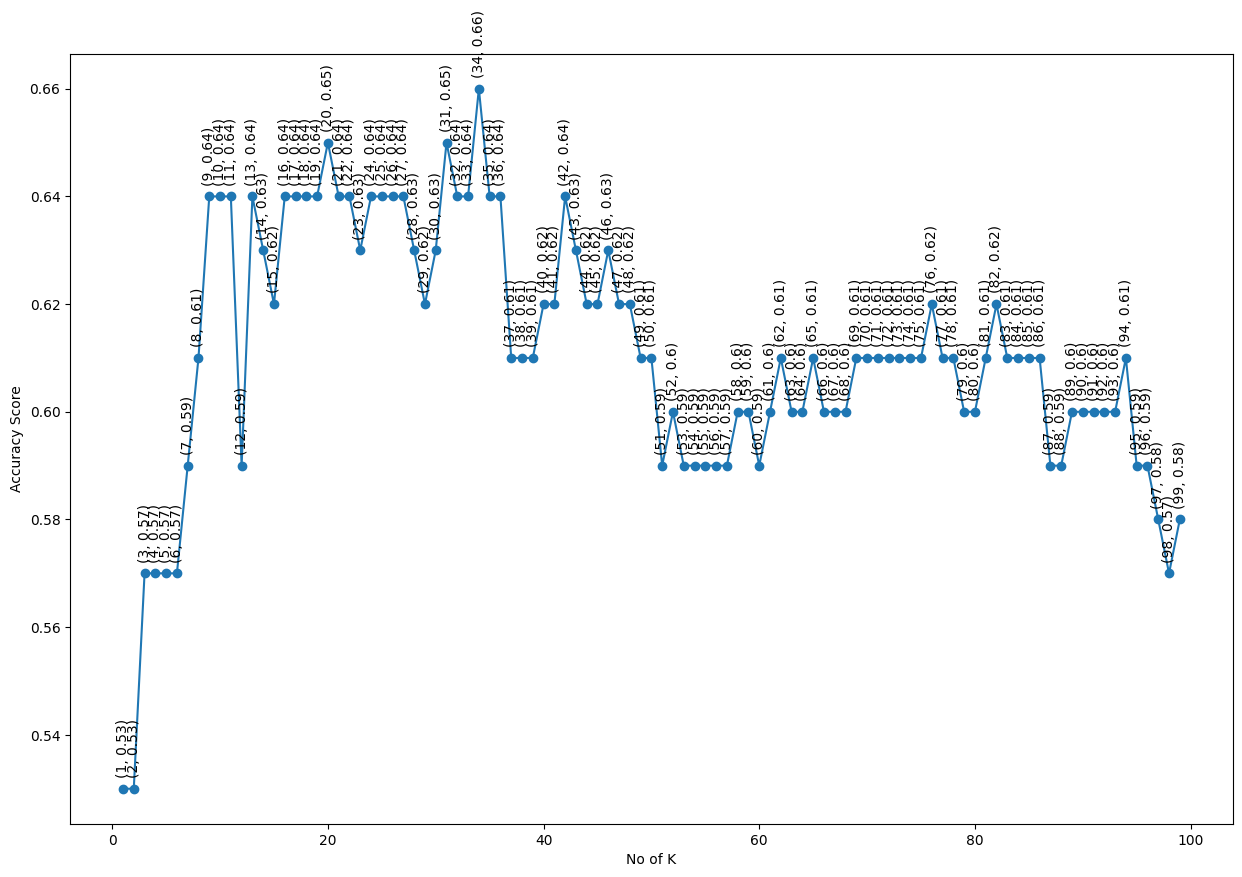

In [222]:
x = np.array([i for i in range(1,100)])
y = acc_list
plt.figure(figsize=(15, 10))
plt.plot(x, y, marker='o', linestyle='-')
# Add annotations
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(f'({xi}, {yi})', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center' , rotation = 90)
plt.xlabel("No of K")
plt.ylabel("Accuracy Score")
plt.show()

In [223]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train , y_train )

KNeighborsClassifier(n_neighbors=20)

In [224]:
y_hat_train_knn = knn.predict(x_train)
y_hat_test_knn = knn.predict(x_test)

In [225]:
model_eval(y_train , y_hat_train_knn)

The Accuracy of the Model is: 0.63
[[ 84  66   8]
 [ 25 203  54]
 [  2  83 115]]
              precision    recall  f1-score   support

           1       0.76      0.53      0.62       158
           2       0.58      0.72      0.64       282
           3       0.65      0.57      0.61       200

    accuracy                           0.63       640
   macro avg       0.66      0.61      0.62       640
weighted avg       0.64      0.63      0.63       640



In [226]:
model_eval(y_test , y_hat_test_knn)

The Accuracy of the Model is: 0.65
[[22 11  2]
 [ 7 50 14]
 [ 0 22 32]]
              precision    recall  f1-score   support

           1       0.76      0.63      0.69        35
           2       0.60      0.70      0.65        71
           3       0.67      0.59      0.63        54

    accuracy                           0.65       160
   macro avg       0.68      0.64      0.65       160
weighted avg       0.66      0.65      0.65       160



## Support Vector Machine Classifier

In [227]:
svm = SVC(C = 5 , kernel = 'poly' , degree = 3)
svm.fit(x_train , y_train)

SVC(C=5, kernel='poly')

In [228]:
y_hat_train_svm = svm.predict(x_train)
y_hat_test_svm = svm.predict(x_test)

In [229]:
model_eval(y_train , y_hat_train_svm)

The Accuracy of the Model is: 0.67
[[ 82  66  10]
 [ 14 193  75]
 [  0  46 154]]
              precision    recall  f1-score   support

           1       0.85      0.52      0.65       158
           2       0.63      0.68      0.66       282
           3       0.64      0.77      0.70       200

    accuracy                           0.67       640
   macro avg       0.71      0.66      0.67       640
weighted avg       0.69      0.67      0.67       640



In [230]:
model_eval(y_test , y_hat_test_svm)

The Accuracy of the Model is: 0.62
[[18 17  0]
 [ 8 39 24]
 [ 0 12 42]]
              precision    recall  f1-score   support

           1       0.69      0.51      0.59        35
           2       0.57      0.55      0.56        71
           3       0.64      0.78      0.70        54

    accuracy                           0.62       160
   macro avg       0.63      0.61      0.62       160
weighted avg       0.62      0.62      0.61       160



# Model Selection

In [231]:
accuracy_table=[['Logistic Regression',round(accuracy_score(y_test , y_hat_test_lr),2)],
  ['Decision Tree', round(accuracy_score(y_test , y_hat_test_dtree),2)],
  ['Random Forest' , round(accuracy_score(y_test , y_hat_test_rf),2)],
  ['Ada Boosting' , round(accuracy_score(y_test , y_hat_test_ada),2)],
  ['Gradient Boosting' , round(accuracy_score(y_test , y_hat_test_gb),2)],
  ['XG Boosting' , round(accuracy_score(y_test_enc , y_hat_test_xgb),2)],
  ['Naive Bayes' , round(accuracy_score(y_test , y_hat_test_nb),2)],
  ['KNN' , round(accuracy_score(y_test , y_hat_test_knn),2)],
  ['SVM' , round(accuracy_score(y_test , y_hat_test_svm),2)]]
df1 = pd.DataFrame(accuracy_table, columns = ['Model','Test_Accuracy'])
print(df1)

                 Model  Test_Accuracy
0  Logistic Regression           0.66
1        Decision Tree           0.64
2        Random Forest           0.69
3         Ada Boosting           0.64
4    Gradient Boosting           0.69
5          XG Boosting           0.67
6          Naive Bayes           0.56
7                  KNN           0.65
8                  SVM           0.62


As the **Model Performance**. We found out that the **Random Forest Classifier** provides the **Best Test Result** among the other models. Model selection is not only based on test result but also **Confusion Matrix** and **Classification Report.**

# Application on Test Dataset

In [232]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               200 non-null    int64  
 1   acc_info          200 non-null    object 
 2   duration_month    200 non-null    int64  
 3   credit_history    200 non-null    object 
 4   purpose           200 non-null    object 
 5   savings_acc       200 non-null    object 
 6   employment_st     195 non-null    object 
 7   poi               195 non-null    float64
 8   personal_status   200 non-null    object 
 9   gurantors         200 non-null    object 
 10  resident_since    200 non-null    int64  
 11  property_type     200 non-null    object 
 12  age               198 non-null    float64
 13  installment_type  200 non-null    object 
 14  housing_type      192 non-null    object 
 15  credits_no        200 non-null    int64  
 16  job_type          200 non-null    object 
 1

In [233]:
test.head()

sno acc_info  duration_month credit_history purpose savings_acc  \
0    1      A14              24            A34     A46         A61   
1    2      A12              18            A34     A43         A61   
2    3      A11              20            A34     A42         A61   
3    4      A14              12            A34     A43         A65   
4    5      A12              12            A32     A40         A65   

  employment_st  poi personal_status gurantors  resident_since property_type  \
0           A75  4.0             A93      A101               4          A124   
1           A75  3.0             A92      A103               4          A121   
2           A75  1.0             A92      A101               4          A122   
3           A75  4.0             A93      A101               4          A123   
4           A71  1.0             A92      A101               2          A121   

    age installment_type housing_type  credits_no job_type  liables telephone  \
0  54.0             A143         A153           2     A173        2      A191   
1  48.0             A141         A151           2     A172        1      A192   
2  24.0             A143         A152           2     A173        1      A191   
3  35.0             A143         A152           2     A173        1      A191   
4  24.0             A143         A151           1     A171        1      A191   

  foreigner  
0      A201  
1      A201  
2      A201  
3      A201  
4      A201

## Data Preparation

In [234]:
data_prep(test)

In [235]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acc_info          200 non-null    object 
 1   duration_month    200 non-null    int64  
 2   credit_history    200 non-null    object 
 3   purpose           200 non-null    object 
 4   savings_acc       200 non-null    object 
 5   employment_st     200 non-null    object 
 6   poi               200 non-null    float64
 7   personal_status   200 non-null    object 
 8   gurantors         200 non-null    object 
 9   resident_since    200 non-null    int64  
 10  property_type     200 non-null    object 
 11  age               200 non-null    float64
 12  installment_type  200 non-null    object 
 13  housing_type      200 non-null    object 
 14  credits_no        200 non-null    int64  
 15  job_type          200 non-null    object 
 16  liables           200 non-null    int64  
 1

## Encoding

In [238]:
data_encode(test)

In [239]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acc_info          200 non-null    int64  
 1   duration_month    200 non-null    int64  
 2   credit_history    200 non-null    int64  
 3   purpose           200 non-null    int64  
 4   savings_acc       200 non-null    int64  
 5   employment_st     200 non-null    int64  
 6   poi               200 non-null    float64
 7   personal_status   200 non-null    int64  
 8   gurantors         200 non-null    int64  
 9   resident_since    200 non-null    int64  
 10  property_type     200 non-null    int64  
 11  age               200 non-null    float64
 12  installment_type  200 non-null    int64  
 13  housing_type      200 non-null    int64  
 14  credits_no        200 non-null    int64  
 15  job_type          200 non-null    int64  
 16  liables           200 non-null    int64  
 1

## Prediction

In [240]:
test['Group_no'] = rf.predict(test)

In [242]:
test['Group_no']

0      2
1      2
2      2
3      3
4      3
      ..
195    2
196    2
197    3
198    2
199    1
Name: Group_no, Length: 200, dtype: int64

# Submission File

In [243]:
sample_submission.head()

serial number  Group_no
0              1         1
1              2         1
2              3         1
3              4         1
4              5         1

In [244]:
sample_submission['Group_no'] = test['Group_no']

In [245]:
sample_submission.head()

serial number  Group_no
0              1         2
1              2         2
2              3         2
3              4         3
4              5         3

In [246]:
sample_submission.to_csv('Final Submission.csv' , index = False)